# Sistema de Tráfego - Grafo Orientado Ligado

Um sistema de tráfego é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e os arcos denotam vias de comunicação só com um sentido. O grafo tem de ser ligado: _entre cada par de nodos_ $\langle n_1,n_2 \rangle$ _tem de existir um caminho_ $n_1 \leadsto n_2$ _e um caminho_ $n_2\leadsto n_1$.

1. Gerar aleatoriamente o grafo com $N \in\{6..10\}$ nodos e com ramos verificando:
   1. Cada nodo tem um número aleatório de descendentes $d\in\{1 .. 3\}$ cujos destinos são também gerados aleatoriamente.
   2. Se existirem "loops" ou destinos repetidos, deve-se gerar outro grafo.
2. Pretende-se fazer manutenção interrompendo determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo ligado.


In [54]:
import networkx as nx
import random
import matplotlib.pyplot as plt

## 1. Geração Aleatória do Grafo


Gerado um grafo com 6 nodos e 16 arestas.


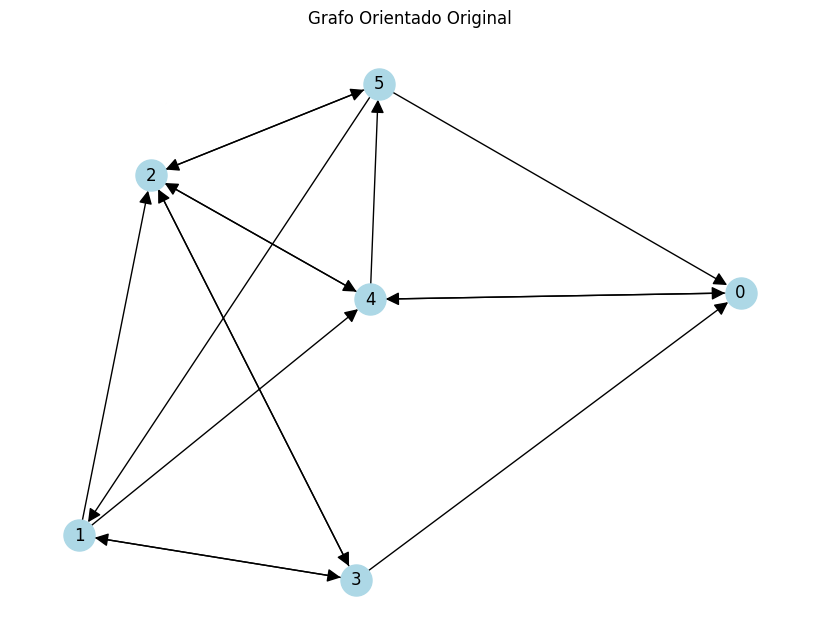

In [55]:
def generate_graph():
    """Gera um grafo direcionado aleatório que atende às especificações do problema."""
    while True:
        # Escolhe aleatoriamente o número de nodos entre 6 e 10
        N = random.randint(6, 10)
        G = nx.DiGraph()
        G.add_nodes_from(range(N))
        
        for node in G.nodes():
            # Cada nodo tem entre 1 e 3 descendentes
            d = random.randint(1, 3)
            destinations = random.sample([n for n in G.nodes() if n != node], d)
            for dest in destinations:
                G.add_edge(node, dest)
        
        # Verifica se o grafo é fortemente conectado e não possui loops
        if nx.is_strongly_connected(G) and not any(node in G[node] for node in G.nodes()):
            return G

# Gera o grafo
G = generate_graph()
print(f"Gerado um grafo com {G.number_of_nodes()} nodos e {G.number_of_edges()} arestas.")

# Visualiza o grafo original
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, arrowsize=20)
plt.title("Grafo Orientado Original")
plt.show()

## 2. Determinação do Maior Número de Vias Removíveis


O maior número de vias que podem ser removidas mantendo o grafo ligado é: 10
Arestas removidas:
  2 -> 4
  4 -> 0
  1 -> 2
  3 -> 1
  1 -> 4
  2 -> 3
  4 -> 5
  5 -> 0
  3 -> 2
  5 -> 2


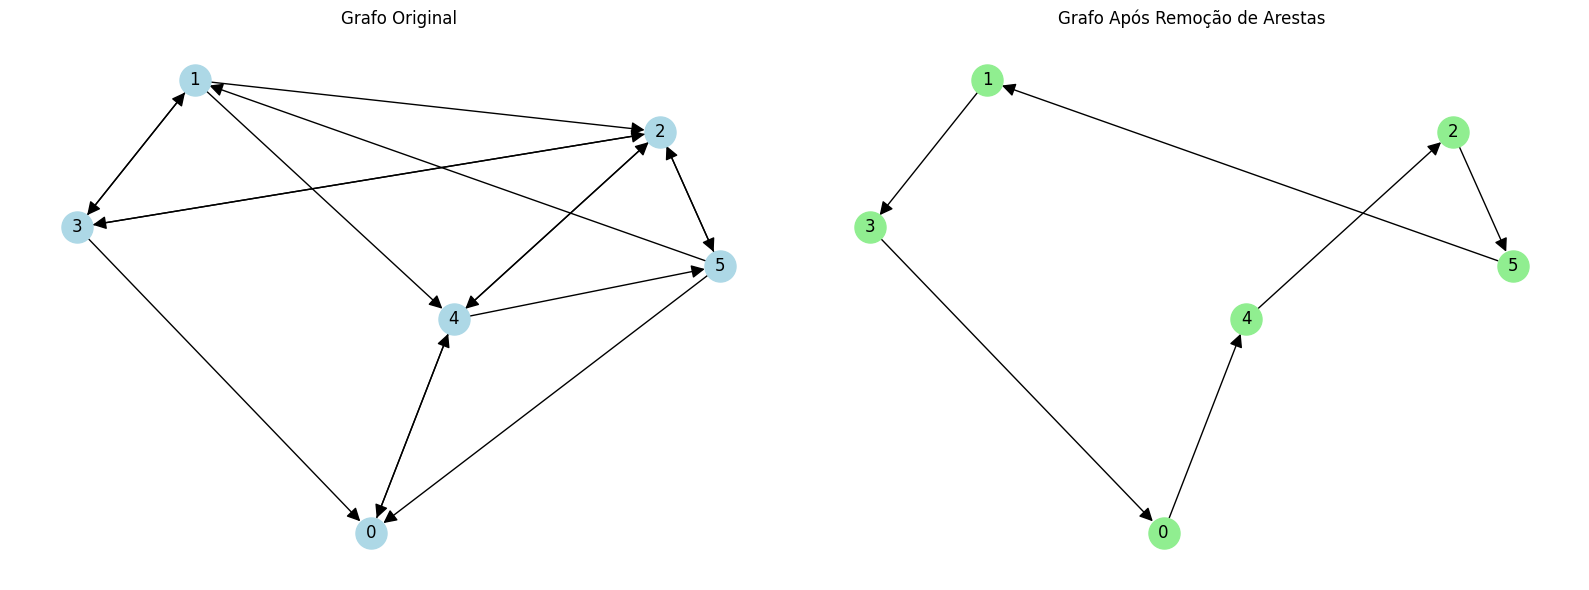

O grafo resultante ainda é fortemente conectado.


In [56]:
def max_removable_edges(G):
    """Determina o maior número de arestas que podem ser removidas mantendo o grafo fortemente conectado."""
    edges = list(G.edges())
    max_removed = 0
    max_removed_set = set()

    while True:
        removed_any = False
        random.shuffle(edges)
        
        for e in edges:
            H = G.copy()
            H.remove_edge(*e)
            if nx.is_strongly_connected(H):
                G = H
                edges.remove(e)
                max_removed += 1
                max_removed_set.add(e)
                removed_any = True
                break
        
        if not removed_any:
            break

    return max_removed, max_removed_set

# Determina as arestas removíveis
max_removed, removed_edges = max_removable_edges(G)
print(f"O maior número de vias que podem ser removidas mantendo o grafo ligado é: {max_removed}")
print("Arestas removidas:")
for edge in removed_edges:
    print(f"  {edge[0]} -> {edge[1]}")

# Cria o grafo resultante após a remoção das arestas
G_result = G.copy()
G_result.remove_edges_from(removed_edges)

# Visualiza os dois grafos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

pos = nx.spring_layout(G)

# Grafo original
nx.draw(G, pos, ax=ax1, with_labels=True, node_color='lightblue', node_size=500, arrowsize=20)
ax1.set_title("Grafo Original")

# Grafo resultante
nx.draw(G_result, pos, ax=ax2, with_labels=True, node_color='lightgreen', node_size=500, arrowsize=20)
ax2.set_title("Grafo Após Remoção de Arestas")

plt.tight_layout()
plt.show()

# Verifica se o grafo resultante ainda é fortemente conectado
if nx.is_strongly_connected(G_result):
    print("O grafo resultante ainda é fortemente conectado.")
else:
    print("ERRO: O grafo resultante não é fortemente conectado!")

## Explicação da Solução

1. Geração do Grafo:

   - Utilizamos a biblioteca NetworkX para criar um grafo direcionado (DiGraph).
   - O número de nodos N é escolhido aleatoriamente entre 6 e 10.
   - Para cada nodo, escolhemos aleatoriamente entre 1 e 3 destinos distintos.
   - Verificamos se o grafo é fortemente conectado e não possui loops antes de aceitá-lo.

2. Determinação do Maior Número de Vias Removíveis:

   - Implementamos uma função que tenta remover arestas aleatoriamente.
   - A função continua removendo arestas enquanto o grafo permanecer fortemente conectado.
   - O processo é repetido até que não seja possível remover mais arestas sem quebrar a conectividade.
   - Contamos o número de arestas removidas e armazenamos as arestas removidas.

3. Visualização:
   - Criamos dois grafos: o original e o resultante após a remoção das arestas identificadas.
   - Usamos matplotlib para visualizar os dois grafos lado a lado, permitindo uma comparação clara.
   - As arestas removidas são destacadas em vermelho no grafo resultante.

Esta solução garante que encontramos o maior número de vias que podem ser removidas mantendo o grafo fortemente conectado. A visualização dos dois grafos lado a lado permite uma compreensão clara das mudanças na estrutura do grafo após a remoção das arestas.
